In [41]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from simple_colors import *
import plotly.figure_factory as ff
import plotly as py
from itertools import cycle, islice
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('fivethirtyeight')
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
import warnings
warnings.filterwarnings("ignore")
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
import psycopg2 as pg

In [42]:
df = 'senate_model'
engine = pg.connect("dbname='postgres' user='postgres' host='elections.c8frdoyd7uok.us-east-2.rds.amazonaws.com' port='5432' password='Flowers89!'")
df = pd.read_sql(f'select * from {df}', con=engine)
df

,index,Unnamed: 0,_year,_state,state_po,state_fips,state_cen,state_ic,office,district,...,candidate,party_detailed,writein,_mode,candidatevotes,totalvotes,unofficial,_version,party_simplified,Results
0,0,0,1976,ARIZONA,AZ,4,86,61,US SENATE,statewide,...,SAM STEIGER,REPUBLICAN,False,total,321236,741210,False,20210114,REPUBLICAN,0
1,1,1,1976,ARIZONA,AZ,4,86,61,US SENATE,statewide,...,WM. MATHEWS FEIGHAN,INDEPENDENT,False,total,1565,741210,False,20210114,OTHER,0
2,2,2,1976,ARIZONA,AZ,4,86,61,US SENATE,statewide,...,DENNIS DECONCINI,DEMOCRAT,False,total,400334,741210,False,20210114,DEMOCRAT,1
3,3,3,1976,ARIZONA,AZ,4,86,61,US SENATE,statewide,...,ALLAN NORWITZ,LIBERTARIAN,False,total,7310,741210,False,20210114,LIBERTARIAN,0
4,4,4,1976,ARIZONA,AZ,4,86,61,US SENATE,statewide,...,BOB FIELD,INDEPENDENT,False,total,10765,741210,False,20210114,OTHER,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3624,3624,3009,2014,SOUTH DAKOTA,SD,46,45,37,US SENATE,statewide,...,RICK WEILAND,DEMOCRAT,False,total,82456,279412,False,20210114,DEMOCRAT,0
3625,3625,3248,2016,SOUTH DAKOTA,SD,46,45,37,US SENATE,statewide,...,JOHN R. THUNE,REPUBLICAN,False,total,265516,369656,False,20210114,REPUBLICAN,1
3626,3626,3249,2016,SOUTH DAKOTA,SD,46,45,37,US SENATE,statewide,...,JAY WILLIAMS,DEMOCRAT,False,total,104140,369656,False,20210114,DEMOCRAT,0
3627,3627,3595,2020,SOUTH DAKOTA,SD,46,45,37,US SENATE,statewide,...,MIKE ROUNDS,REPUBLICAN,False,total,276232,420219,True,20210114,REPUBLICAN,1


In [43]:
df = df.dropna()
df= df[df['Results'] != 0]
df

,index,Unnamed: 0,_year,_state,state_po,state_fips,state_cen,state_ic,office,district,...,candidate,party_detailed,writein,_mode,candidatevotes,totalvotes,unofficial,_version,party_simplified,Results
2,2,2,1976,ARIZONA,AZ,4,86,61,US SENATE,statewide,...,DENNIS DECONCINI,DEMOCRAT,False,total,400334,741210,False,20210114,DEMOCRAT,1
7,7,282,1980,ARIZONA,AZ,4,86,61,US SENATE,statewide,...,BARRY GOLDWATER,REPUBLICAN,False,total,432371,874238,False,20210114,REPUBLICAN,1
11,11,404,1982,ARIZONA,AZ,4,86,61,US SENATE,statewide,...,DENNIS DECONCINI,DEMOCRAT,False,total,411970,723885,False,20210114,DEMOCRAT,1
18,18,660,1986,ARIZONA,AZ,4,86,61,US SENATE,statewide,...,JOHN MCCAIN,REPUBLICAN,False,total,521850,862921,False,20210114,REPUBLICAN,1
24,24,776,1988,ARIZONA,AZ,4,86,61,US SENATE,statewide,...,DENNIS DECONCINI,DEMOCRAT,False,total,660403,1164539,False,20210114,DEMOCRAT,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3619,3619,2400,2008,SOUTH DAKOTA,SD,46,45,37,US SENATE,statewide,...,TIM JOHNSON,DEMOCRAT,False,total,237889,380673,False,20210114,DEMOCRAT,1
3620,3620,2647,2010,SOUTH DAKOTA,SD,46,45,37,US SENATE,statewide,...,JOHN THUNE,REPUBLICAN,False,total,227947,227947,False,20210114,REPUBLICAN,1
3621,3621,3006,2014,SOUTH DAKOTA,SD,46,45,37,US SENATE,statewide,...,MIKE ROUNDS,REPUBLICAN,False,total,140741,279412,False,20210114,REPUBLICAN,1
3625,3625,3248,2016,SOUTH DAKOTA,SD,46,45,37,US SENATE,statewide,...,JOHN R. THUNE,REPUBLICAN,False,total,265516,369656,False,20210114,REPUBLICAN,1


     state_po  _year  candidatevotes  totalvotes winning_party
2739       GA   1978          536320      645128      DEMOCRAT
2741       GA   1980          803686     1579829    REPUBLICAN
2744       GA   1984         1344104     1681344      DEMOCRAT
2747       GA   1986          623707     1225008      DEMOCRAT
2748       GA   1990         1033439     1033439      DEMOCRAT
2751       GA   1992         1108416     2251587      DEMOCRAT
2756       GA   1996         1103993     2259224      DEMOCRAT
2761       GA   1998          918540     1753953    REPUBLICAN
2766       GA   2000         1413224     2415743      DEMOCRAT
2768       GA   2002         1071352     2031604    REPUBLICAN
2772       GA   2004         1864202     3220981    REPUBLICAN
2782       GA   2008         1867097     3752485    REPUBLICAN
2788       GA   2010         1489904     2555258    REPUBLICAN
2789       GA   2014         1358088     2567805    REPUBLICAN
2798       GA   2016         2135806     3898605    REP

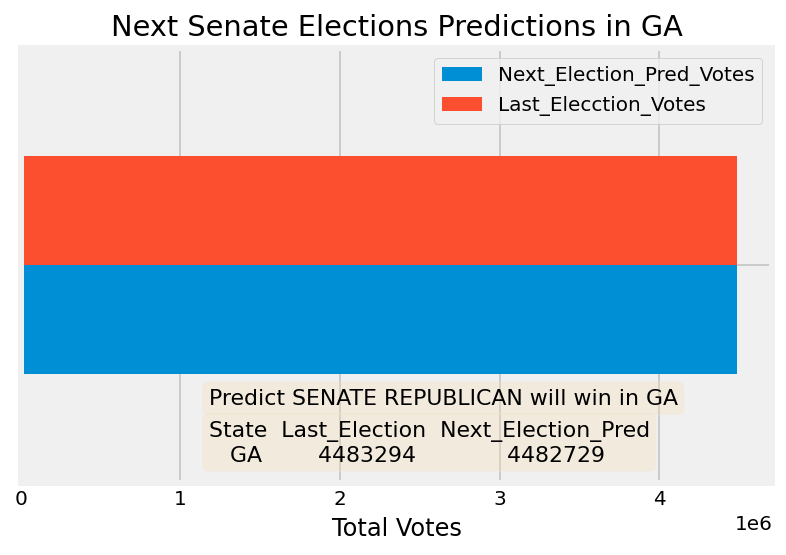

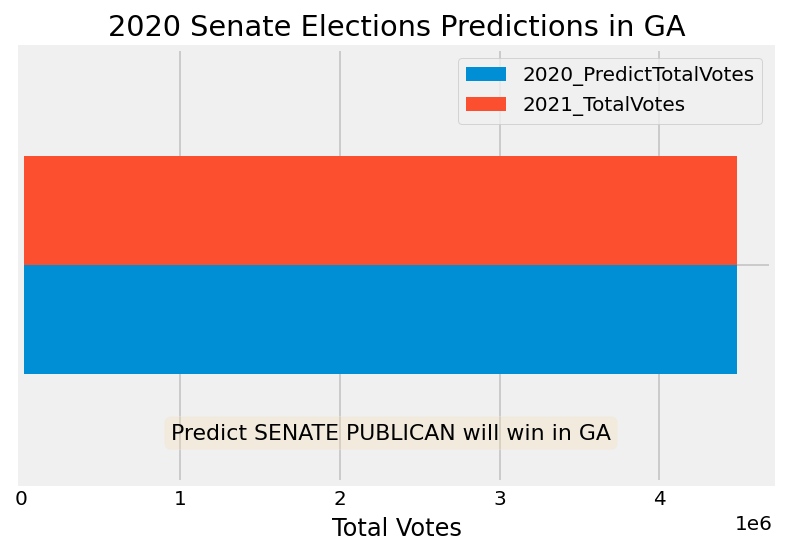

Typo! Please try again.



In [44]:
while True:
    df.rename(columns = {'party_simplified' : 'winning_party'},inplace = True)
    try:
        state = input("Please enter the STATE to predict: ").strip().upper()   
        df = df.loc[df.state_po == state]   
        #print(red("Typo! Please try again."))
        columns = ['state_po', '_year', 'candidatevotes', 'totalvotes','winning_party']
        df = df[columns]    
        #print(f"Here's {state} DataFrame {df}"'\n')
        print(df)

        #FIRST PREDICTION
        ##the last column is our label
        y_train = df.totalvotes.values
        #drop last column of data
        X_train = df.drop(['winning_party', 'state_po'], axis=1)
        #drop first colum of data
        X_test = df.drop(['winning_party', 'state_po', '_year'], axis=1)
        from sklearn.ensemble import RandomForestRegressor
        model = RandomForestRegressor(max_depth=5, random_state=1, n_estimators=1000).fit(X_train, y_train)
        y_pred = model.predict(X_train)
        new_pred = y_pred[-1]
        prediction = pd.DataFrame({'State':df.state_po,'Last_Election':df.totalvotes, 'Next_Election_Pred': y_pred.astype(int)}, index=None)
        prediction = prediction.iloc[[-1]]
        print (prediction.to_string(index=False))

        y = df.totalvotes.values
        #drop last column of data
        X = df.drop(['winning_party', 'state_po'], axis=1)
        X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1, test_size=0.01) #0.2 means only 20% sample
        X_train.shape, X_test.shape, y_train.shape, y_test.shape
        model = RandomForestRegressor(max_depth=5, random_state=1, n_estimators=1000).fit(X_train, y_train)
        y_pred = model.predict(X_train).astype(int)
        #print(blue(f"Predict_Score of {state}: {model.score(X_train, y_train)}"))
        total_votes_pred = y_pred[-1]
        total_votes_pred

            #SECOND PREDICTION
        df.winning_party = df. winning_party.replace({'DEMOCRAT': 1, 'REPUBLICAN': 2, 'LIBERTARIAN': 3, 'OTHER': 4})
        # the last column is our label
        y = df.winning_party.values
        #drop last column of data
        X = df.drop(['winning_party', 'state_po'], axis=1)
        X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1, test_size=0.01) #0.2 means only 20% sample
        #print(X_train.shape)
        model2 = RandomForestRegressor(max_depth=5, random_state=1, n_estimators=1000).fit(X_train, y_train)
        y_pred = model2.predict(X_train)
        #print(len(y_pred))
        print(blue(f"Predict_Score of {state}: {model2.score(X_train, y_train)}"))
        #print(y_pred)
    except AttributeError:
        print(red("Typo! Please try again."'\n'))
        break

    lst1 = [x for x in y_train[-20:] if x == 1] 
    dem = len(lst1)
    lst2 = [x for x in y_train[-20:] if x == 2] 
    rep = len(lst2)
    lst3 = [x for x in y_train[-20:] if (x ==3)] 
    lib = len(lst3)
    lst4 = [x for x in y_train[-20:] if (x != 1 and x !=2 and x !=3)] 
    other = len(lst4)
    if other > dem and other > rep:
        print_pred = f"Predict OTHER will win in {state}"
        print(green(f"Predict OTHER will win in {state} next Election."))
    elif dem > rep and dem >= other:      
        print_pred = f"Predict SENATE DEMOCRAT will win in {state}"
        print(blue(f"Predict SENATE DEMOCRAT will win in {state} next Election."))
    elif rep >= dem and rep >= other:
        print_pred = f"Predict SENATE REPUBLICAN will win in {state}"
        print(red(f"Predict SENATE REPUBLICAN will win in {state} next Election."))
    #print(dem, rep, lib, other)

    #First Plot
    word = [""]
    old_votes = df['totalvotes'].iloc[-1]
    df1 = pd.DataFrame({"Next_Election_Pred_Votes": new_pred, "Last_Elecction_Votes": old_votes}, index=word) 
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.3)
    df1.plot.barh()
    plt.annotate(f"{prediction.to_string(index=False)}", xy=(0.25, 0.05), fontsize=11, xycoords='axes fraction', bbox=props)
    plt.annotate(print_pred, xy=(0.25, 0.18), fontsize=11, xycoords='axes fraction', bbox=props)
    plt.xlabel('Total Votes')
    plt.title(f"Next Senate Elections Predictions in {state}")
    plt.show()

    #Second Plot
    try:
        a = [int(x) for x in input("Enter a list[year, candidatevotes, totalvotes] to test the prediction: ").split()]
    except:
        print(red("Typo! Please try again."'\n'))
        break
    if a == []:
        print(red("Typo! Please try again."'\n'))
        break
    old_year = df['_year'].iloc[-1]
    new_year = a[0]
    new_votes = a[2]
    test_prediction = model2.predict([a])
    word = [""]
    old_votes = df['totalvotes'].iloc[-1]
    df = pd.DataFrame({f"{new_year}_PredictTotalVotes": new_votes, f"{old_year}_TotalVotes": old_votes}, index=word) 
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.3)
    df.plot.barh()
    if test_prediction < [1.5]:
        plt.annotate(f"Predict SENATE DEMOCRAT will win in {state}", xy=(0.25, 0.1), fontsize=11, xycoords='axes fraction', bbox=props)
    elif test_prediction > [1.5]:
        plt.annotate(f"Predict SENATE PUBLICAN will win in {state}", xy=(0.2, 0.1), fontsize=11, xycoords='axes fraction', bbox=props)
    else:
        plt.annotate(f"Predict Other will win in {state}", xy=(0.2, 0.1), fontsize=11, xycoords='axes fraction', bbox=props)
    plt.xlabel('Total Votes')
    plt.title(f"{new_year} Senate Elections Predictions in {state}")
    plt.show()

